# Exploration of Pisa Data
## by Jannik Hehemann

## Preliminary Wrangling

> The dataset I will explore and analyze in this project is a dataset of a PISA study, where information about students all over the world  were gathered. The information contain individual learning attitudes and skills as well as socio-economic, psychological and other environmental factors. I want to investigate correlations between the students academic performances, wealth, sense of belonging to school, their economic, social and cultural status and their immigration status.

In [1]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

> Firstly I load  the pisa-dataset and after that describe its properties by answering some questions.

In [2]:
#loading dataset
pisa_raw = pd.read_csv('pisa2012.csv', encoding='latin-1')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### What is the structure of the dataset?



In [3]:
pisa_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


> This dataset has 485490 entries (rows) with 636 columns describing the data. The datatypes in this dataset are 250 float64, 18 int64 and 368 object. 

### What is/are the main feature(s) of interest in your dataset?
> Is there a difference between academic performances of a students with different immigration backgrounds? 
- ST01Q01 - International Grade
- GRADE - Grade compared to modal grade in country

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


> How does the immigration status correlate with the students wealth and social, cultural and economical status? Does the immigration status have an influence on the sense of belonging to school?
- IMMIG - Students Immigration Status
- ESCS - Index of economic, social and cultural status
- WEALTH - Wealth
- BELONG - Students sense of belonging to the school

## Univariate Exploration

> In this section, I investigate distributions of individual variables. If
I see unusual points or outliers, I will take a deeper look to clean things up
and prepare myself to look at relationships between variables. Before I start I will drop columns and rows that I don't need.

In [4]:
# work with columns of interest from this point on
pisa = pisa_raw[['ST01Q01', 'GRADE', 'IMMIG', 'ESCS', 'WEALTH', 'BELONG']].copy()

In [5]:
pisa.shape

(485490, 6)

In [6]:
# How many null values are in each column
pisa.isnull().sum()

ST01Q01         0
GRADE         873
IMMIG       13697
ESCS        11842
WEALTH       5893
BELONG     172091
dtype: int64

In [7]:
# dropping rows where any of the cells have a null value
pisa.dropna(inplace = True)
pisa.shape

(302732, 6)

In [8]:
pisa.isnull().sum()

ST01Q01    0
GRADE      0
IMMIG      0
ESCS       0
WEALTH     0
BELONG     0
dtype: int64

In [9]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302732 entries, 4743 to 485488
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ST01Q01  302732 non-null  int64  
 1   GRADE    302732 non-null  float64
 2   IMMIG    302732 non-null  object 
 3   ESCS     302732 non-null  float64
 4   WEALTH   302732 non-null  float64
 5   BELONG   302732 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.2+ MB


> The dataset I will work with from this piont on has 302732 entries (rows) and 6 columns describing the data. The datatypes in this dataset are 4 float64, 1 int64 and 1 object. 

> I will start the exploration by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()` where appropriate as well as univariate visualizations.

### International Grade

In [10]:
pisa['ST01Q01'].describe()

count    302732.000000
mean          9.668192
std           0.745758
min           7.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          13.000000
Name: ST01Q01, dtype: float64

In [11]:
pisa['ST01Q01'].value_counts()

10    165094
9      95295
11     24234
8      13972
12      2191
7       1944
13         2
Name: ST01Q01, dtype: int64

> The variable is of type integer, has its minimum at 7 and its maximum at 13. I am going to visualize the distribution in a histogram in the next step.

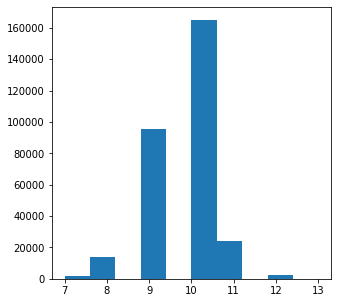

In [12]:
# plotting histogram of international grades distribution
plt.figure(figsize = [5, 5]) 
plt.hist(data = pisa, x = 'ST01Q01');

>The histogram confirmed what the data indicated. For better visualization I will rescale the x axis with `log10`.

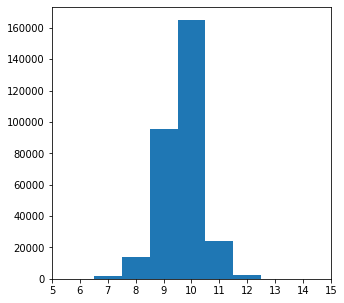

In [13]:
# exclude the outliers (score 96) and zoom into the interesting part
# change bin size, axis limits and axis ticks
plt.figure(figsize = [5, 5]) 
bins = np.arange(0.5, pisa['ST01Q01'].max()+0.5, 1)
plt.hist(data = pisa, x = 'ST01Q01', bins = bins);
plt.xticks(np.arange(1, 21, 1));
plt.xlim((5,15));

> This looks quite nice. The histogram shows that the data is rather normally distributed and has its peak at 10. For better comparism I will plot the two histograms with the different bin buckets of x-axis in one figure with subplots.

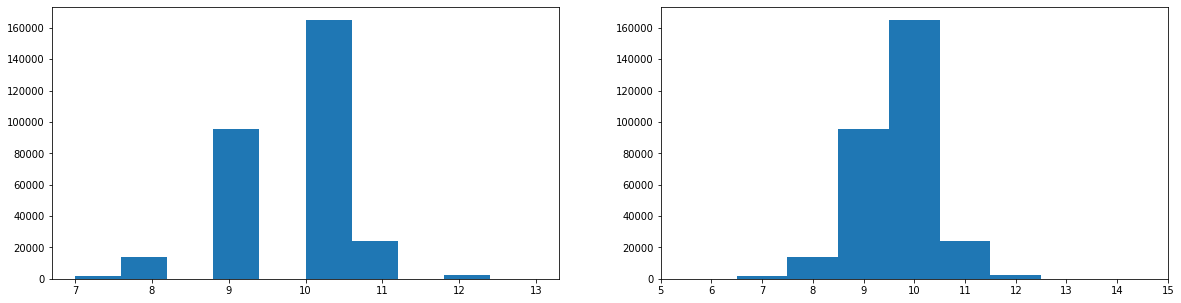

In [14]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(data = pisa, x = 'ST01Q01');

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0.5, pisa['ST01Q01'].max()+0.5, 1)
plt.hist(data = pisa, x = 'ST01Q01', bins = bins);
plt.xticks(np.arange(1, 21, 1));
plt.xlim((5,15));

### Grade compared to modal grade in country

> I will start the exploration by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()` if appropriate, as well as univariate visualizations.

In [15]:
pisa['GRADE'].describe()

count    302732.000000
mean         -0.148851
std           0.641170
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: GRADE, dtype: float64

In [16]:
pisa['GRADE'].value_counts()

 0.0    219861
-1.0     46009
 1.0     24729
-2.0      9044
-3.0      2375
 2.0       711
 3.0         3
Name: GRADE, dtype: int64

> The variable is of type float, has its minimum at -3 and its maximum at 3.

#### Define

Only 5 people have the maximum score of 3. I am going to exclude these rows from my dataset for unbiased analysis and visualizations. 

#### Code

In [17]:
# get indices of rows that will be dropped
drp_idx = pisa.index[pisa['GRADE'] == 3.0].tolist()

# drop rows with defined indices
pisa = pisa.drop(drp_idx)

#### Test

In [18]:
# get the new counts
pisa['GRADE'].value_counts()

 0.0    219861
-1.0     46009
 1.0     24729
-2.0      9044
-3.0      2375
 2.0       711
Name: GRADE, dtype: int64

> The outlier has been cleaned.

> I am going to visualize the distribution in a histogram in the next step.

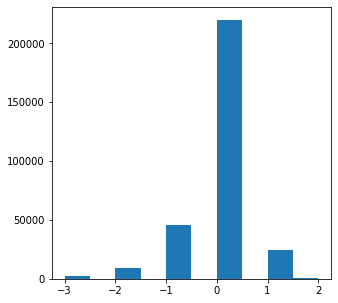

In [19]:
# plotting histogram of grades compared to modal grade in country
rcParams['figure.figsize'] = 5,5
plt.hist(data = pisa, x = 'GRADE');

> The visualization is not very nice, so I will change the bin size and the x-labels in the next visualization for better readability. 

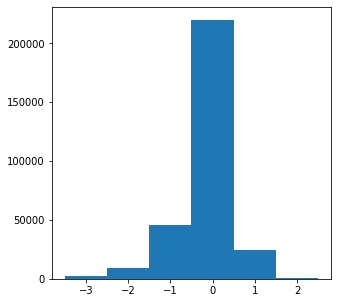

In [20]:
# change bin size
bins = np.arange(-3.5, pisa['GRADE'].max()+1, 1)
plt.hist(data = pisa, x = 'GRADE', bins = bins);
plt.xticks(np.arange(-3, 3, 1));

> The histogram shows that the data is rather normally distributed and has its peak at 0.

### Immigration status

> The next variable I will have a look at is the students' immigration status by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()` if appropriate as well as univariate visualizations.

In [21]:
pisa['IMMIG'].describe()

count     302729
unique         3
top       Native
freq      268101
Name: IMMIG, dtype: object

In [22]:
pisa['IMMIG'].value_counts()

Native               268101
Second-Generation     18049
First-Generation      16579
Name: IMMIG, dtype: int64

> The variable is of type object and has three dimensions 'Native', 'First-Generation' and 'Second-Generation'. In order to have a look at the distribution between these three values I will plot a pie chart. 

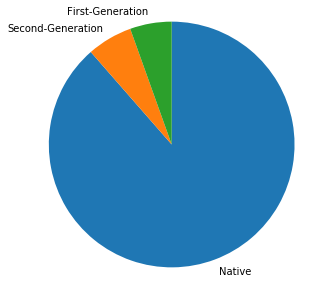

In [23]:
# overview of the distribution of the immigration status
sorted_counts = pisa['IMMIG'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

> The data shows that roughly 90% of the students are native, 5% have an immigration status of 'First-Generation' and 5% of 'Second-Generation'.

### Index of economic, social and cultural status

> The next variable I will have a look at is the students' index of economic, social and cultural status by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()` if appropriate as well as univariate visualizations.

In [24]:
pisa['ESCS'].describe()

count    302729.000000
mean         -0.252992
std           1.124553
min          -5.950000
25%          -0.980000
50%          -0.180000
75%           0.620000
max           3.270000
Name: ESCS, dtype: float64

> The variable is of type float, has its minimum at 5.95 and its maximum at 3.27. I am going to visualize the distribution in a histogram in the next step.

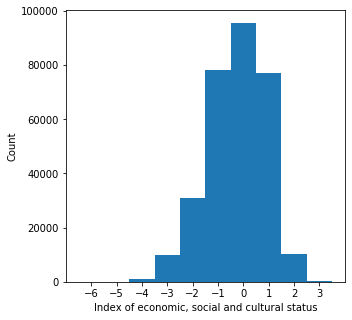

In [25]:
# plotting histogram, setting bin size and useing axis labelings
bins = np.arange(-6.5, pisa['ESCS'].max()+1, 1)
plt.hist(data = pisa, x = 'ESCS', bins = bins);
plt.xticks(np.arange(-6, 4, 1));
plt.ylabel('Count')
plt.xlabel('Index of economic, social and cultural status');

> The data shows a normal distribution for the index of economic, social and cultural status.

### Students' wealth

> The next variable I will have a look at is the students' wealth by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()` if appropriate as well as univariate visualizations.

In [26]:
pisa['WEALTH'].describe()

count    302729.000000
mean         -0.319668
std           1.205984
min          -6.080000
25%          -1.030000
50%          -0.290000
75%           0.440000
max           3.250000
Name: WEALTH, dtype: float64

> The variable is of type float, has its minimum at 6.08 and its maximum at 3.25. I am going to visualize the distribution in a histogram in the next step.

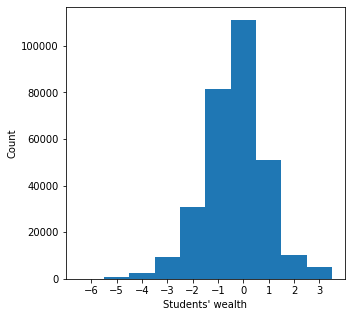

In [27]:
# plotting histogram, setting bin size and useing axis labelings
bins = np.arange(-6.5, pisa['WEALTH'].max()+1, 1)
plt.hist(data = pisa, x = 'WEALTH', bins = bins);
plt.xticks(np.arange(-6, 4, 1));
plt.ylabel('Count')
plt.xlabel("Students' wealth");

> The data shows a normal distribution for the students' wealth.

### Students' sense of belonging to school

> The next variable I will have a look at is the students' wealth by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()` if appropriate as well as univariate visualizations.

In [28]:
pisa['BELONG'].describe()

count    302729.000000
mean         -0.020830
std           0.981768
min          -3.690000
25%          -0.740000
50%          -0.150000
75%           0.560000
max           2.630000
Name: BELONG, dtype: float64

> The variable is of type float, has its minimum at 3.69 and its maximum at 2.63. I am going to visualize the distribution in a histogram in the next step.

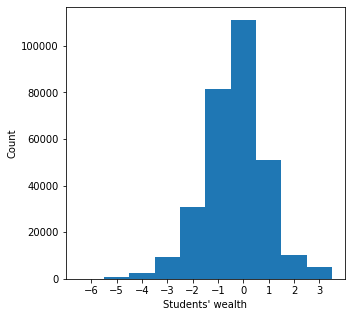

In [29]:
# plotting histogram, setting bin size and useing axis labelings
bins = np.arange(-6.5, pisa['WEALTH'].max()+1, 1)
plt.hist(data = pisa, x = 'WEALTH', bins = bins);
plt.xticks(np.arange(-6, 4, 1));
plt.ylabel('Count')
plt.xlabel("Students' wealth");

> The data shows a normal distribution for the students' sense of belonging to school.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All the numeric variables are normally distributed. The only categorical data type is the immigration status. The data shows that roughly 90% of the students are native, 5% have an immigration status of 'First-Generation' and 5% of 'Second-Generation'.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions in the features I investigated. 
> Before I started exploring the dataset I reduced the dataset to a minimum number of columns of interest that were relevant for my initial analysis question. There were some null-values in all columns except for the international grade data. I dropped those rows with null values in it and worked with the reduced dataset, so that null values would not bias the visualizations. 
> Ther were three outliers in the GRADE column. Only 5 people have the maximum score of 3. I excluded these rows from my dataset for unbiased analysis and visualizations in the following exploration. 


## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the pisa data
data.

### Sense of belonging to school (`BELONG`) for different immigration stati (`IMMIG`)

> In this part I will explore the students' sense of belonging to school in dependence of their immigration status.  

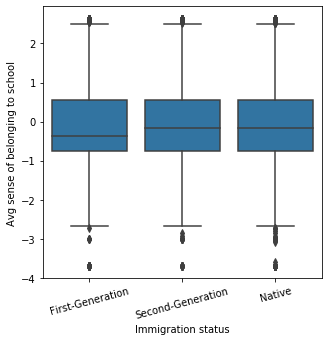

In [30]:
# setting base colour in separate variable
base_color = sb.color_palette()[0]

# setting the order of immigration status visualizations
gen_order = ['First-Generation', 'Second-Generation', 'Native']

# defining figure size
rcParams['figure.figsize'] = 5,5

# plotting a boxplot with the sense of belonging to school and the uncertainty whiskers for different immigration groups
sb.boxplot(data = pisa, x = 'IMMIG', y = 'BELONG', color = base_color, order = gen_order)
plt.xticks (rotation = 15);
plt.ylabel('Avg sense of belonging to school');
plt.xlabel('Immigration status');

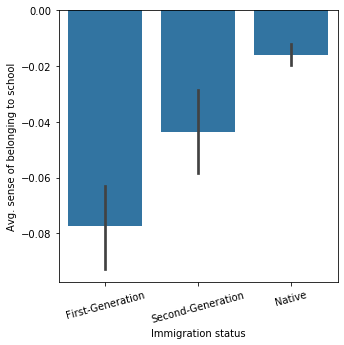

In [31]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# plotting a barplot with the sense of belonging to school and the uncertainty whiskers for different immigration groups
sb.barplot(data = pisa, x = 'IMMIG', y = 'BELONG', color = base_color, order = gen_order)
plt.xticks (rotation = 15);
plt.ylabel('Avg. sense of belonging to school');
plt.xlabel('Immigration status');

> Students that have a immigration status of 'First-Generation' have on average the lowest sense of belonging to their school amongst all three `IMMIG` groups. This might be explained by the fact that the students themselves immigrated and switched school from the home country to the new country. On the other side most of the students in the second-generation immigration group have been attending school from class one as the native students. This might lead to the higher sense of belonging to the school for those groups, which is shown in the chart.

### Sense of belonging to school (`BELONG`) for different grades compared to modal grade of country (`GRADE`)

> In the following section I will have a look at how the grade correlates with the sense of belonging to the school.

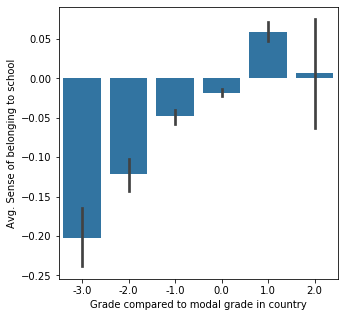

In [32]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# plotting a barplot with the sense of belonging to school and the uncertainty whiskers for different grades
sb.barplot(data = pisa, x = 'GRADE', y = 'BELONG', color = base_color)
plt.xlabel('Grade compared to modal grade in country')
plt.ylabel('Avg. Sense of belonging to school');

> The plot shows that better grades correlate with a higher sense of belonging to the school. The uncertainty whiskers at the grade values of 2.0 indicate that there might be students that have a less sense of belonging to the school even less than students with less than -1.0 in the grade values. This seems to be counterintuitive. It could be explained in the following way: Some students that are extrordinary good in school and way better than their classmates, might feel they do not belong to the school, because it does not fit their capabilities.

### Modal grade in the country (`GRADE`) for the different immigration stati (`IMMIG`)

> I will use the barplot to show the mean grades compared to the modal grade in the country for the different immigration stati.

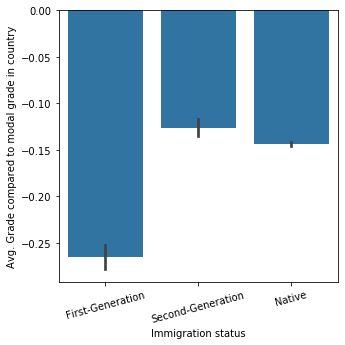

In [33]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# get the means and uncertainty whiskers of the grades compared to the modal grade in the country on a barplot per immigration status
sb.barplot(data = pisa, x = 'IMMIG', y = 'GRADE', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('Avg. Grade compared to modal grade in country');
plt.xticks (rotation = 15);

> Students with first-generation immigration status have on average worse grades compared to modal grades in the country than the native and the second-generation immigration students, whereas the difference between the native and the second-generation immigration students is very little. 

### Index of economic, social and cultural status (`ESCS`) for different immigration stati (`IMMIG`)
> I will use a violin, boxplots and barplots to show how the distribution of the index of economic, social and cultural status is distributed within the immigration stati.

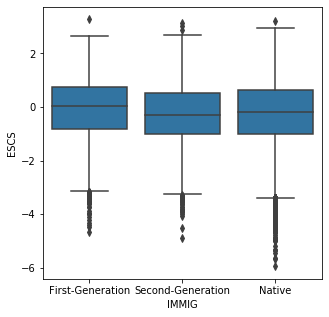

In [34]:
# plotting a boxplot to confirm the findings with the violin plot
rcParams['figure.figsize'] = 5,5
sb.boxplot(data = pisa, x = 'IMMIG', y = 'ESCS', order = gen_order, color = base_color);

#### violin plot

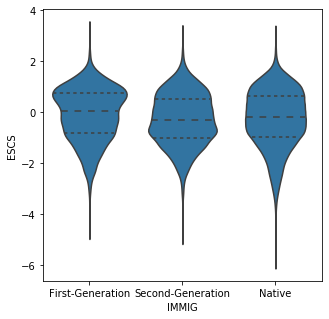

In [35]:
# plotting the violinplot with quartile lines
rcParams['figure.figsize'] = 5,5
sb.violinplot(data = pisa, x = 'IMMIG', y = 'ESCS', order = gen_order, color = base_color, inner = 'quartiles');

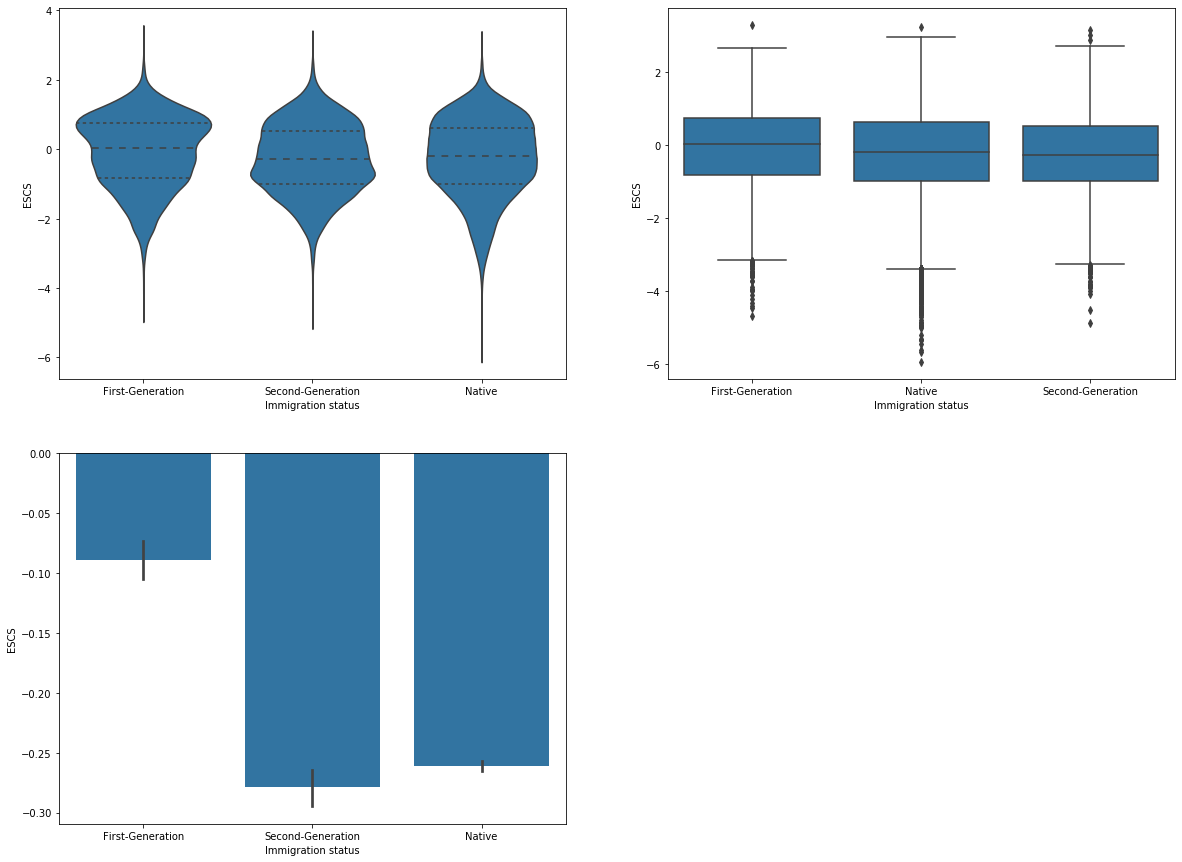

In [36]:
# plotting both next to each other for better comparism
plt.figure(figsize = [20, 15])

# LEFT plot: violin plot
plt.subplot(2, 2, 1)
sb.violinplot(data = pisa, x = 'IMMIG', y = 'ESCS', order = gen_order, color = base_color, inner = 'quartiles');
plt.xlabel('Immigration status')
plt.ylabel('ESCS');

# MIDDLE plot: box plot
plt.subplot(2, 2, 2)
sb.boxplot(data = pisa, x = 'IMMIG', y = 'ESCS', color = base_color);
plt.xlabel('Immigration status')
plt.ylabel('ESCS');

# RIGHT plot: bar plot
plt.subplot (2, 2, 3)
sb.barplot(data = pisa, x = 'IMMIG', y = 'ESCS', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('ESCS');


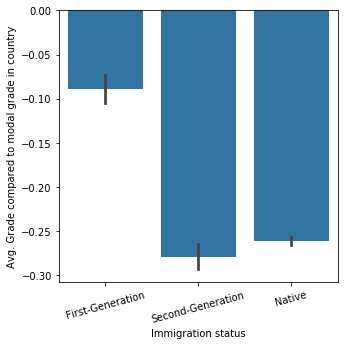

In [37]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# get the means and uncertainty whiskers of the grades compared to the modal grade in the country on a barplot per immigration status
sb.barplot(data = pisa, x = 'IMMIG', y = 'ESCS', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('Avg. Grade compared to modal grade in country');
plt.xticks (rotation = 15);

> The plots indicate that the students with first generation immigration status have most of the ESCS index scores distributed between 0.5 and 1 whereas the native students and second generation immigration students have their maximum of indices distributed at an index between -0.5 and -1. The mean ESCS scores of the first-generation immigration students is also lower than the mean of the other immigraion groups. This leads to the conclusion that first generation immigrants have a higher chance to have a higher economic, social and cultural status than native students or second generation immigrants

### International grade (`ST01Q01`) for the different immigration stati (`IMMIG`)

> I will use the barplot to show the international grades for the different immigration stati.

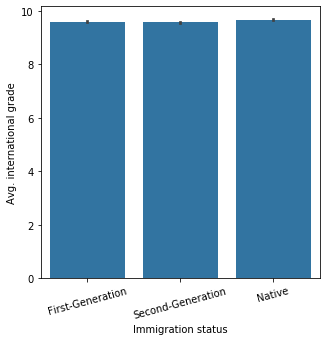

In [38]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# get the means and uncertainty whiskers of the international grades on a barplot per immigration status
sb.barplot(data = pisa, x = 'IMMIG', y = 'ST01Q01', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('Avg. international grade');
plt.xticks (rotation = 15);

> To zoom a little bit in and emphasize the differences between the immigration types I use the pointplot. 

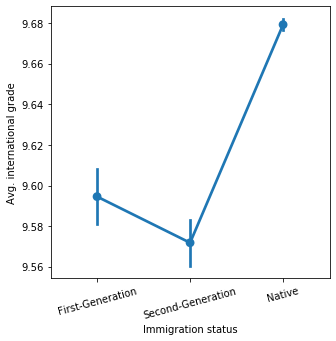

In [39]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# get the means and errors of the international grades on a pointplot per immigration status
sb.pointplot(data = pisa, x = 'IMMIG', y = 'ST01Q01', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('Avg. international grade');
plt.xticks (rotation = 15);

> The mean international grade (`ST01Q01`) of the native immigration group (`IMMIG`) is higher than the other two. But all of them are very close.

### Students' wealth (`WEALTH`) for the different immigration stati (`IMMIG`)

> I will use the barplot to show the students wealth for the different immigration stati.

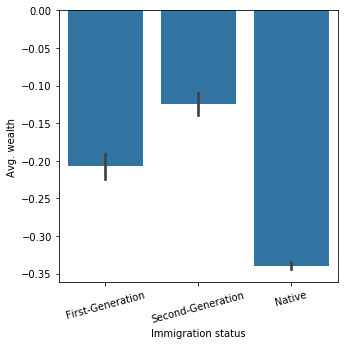

In [40]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# get the means and uncertainty whiskers of the students' wealth on a barplot per immigration status
sb.barplot(data = pisa, x = 'IMMIG', y = 'WEALTH', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('Avg. wealth');
plt.xticks (rotation = 15);

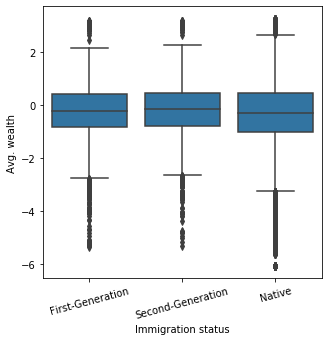

In [41]:
# defining figure size
rcParams['figure.figsize'] = 5,5

# get the quantiles of the students' wealth on a boxplot per immigration status
sb.boxplot(data = pisa, x = 'IMMIG', y = 'WEALTH', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('Avg. wealth');
plt.xticks (rotation = 15);

> The charts show that the native students are on average less wealthy. In the boxplot the median wealth of the native students is lower than of those with immigration background. 

### Correlations between Grade compared to modal grade in country (`GRADE`) and index of economic, social and cultural status (`ESCS`)

#### Scatterplot

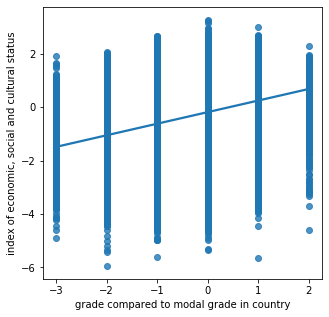

In [42]:
# Scatter plot between grade compared to modal grade in country and index of economic, social and cultural status
rcParams['figure.figsize'] = 5,5
sb.regplot(data = pisa, x = 'GRADE', y = 'ESCS');
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

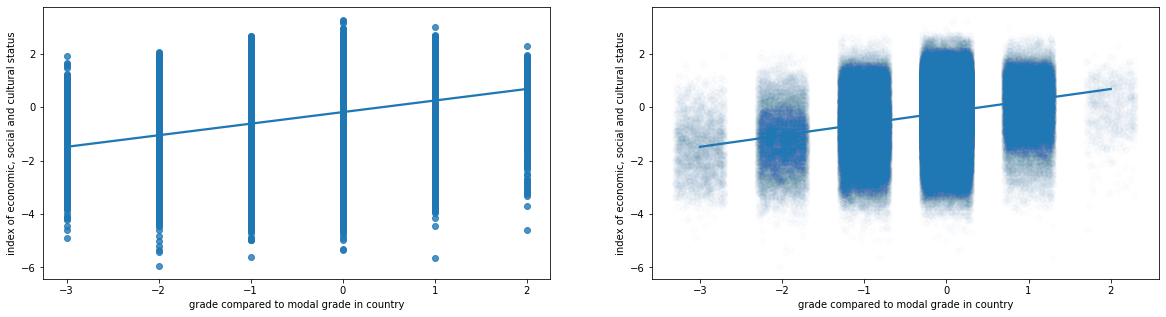

In [43]:
# plotting the original and the new scatterplot with jitter and transparency next to each other using subplot
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
rcParams['figure.figsize'] = 10,10
sb.regplot(data = pisa, x = 'GRADE', y = 'ESCS');
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

plt.subplot(1,2,2)
sb.regplot(data = pisa, x = 'GRADE', y = 'ESCS', x_jitter = 0.3, 
           scatter_kws = {'alpha': 1/100});
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

#### Heatmap

> I will emphasize the relationship between the two variables by creating a heatmap

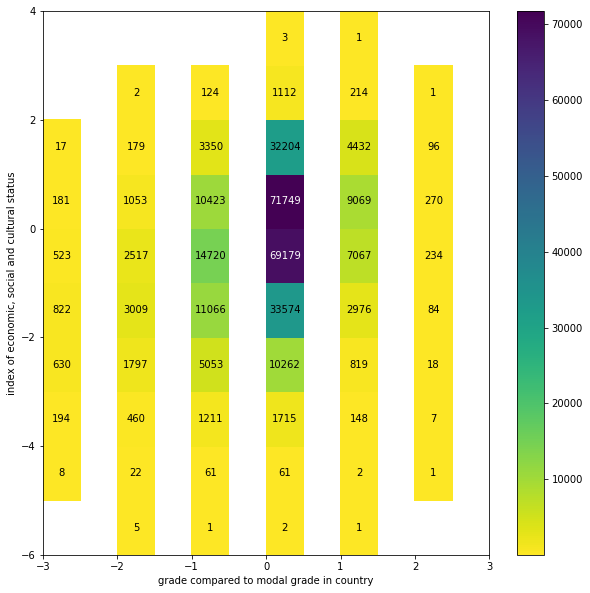

In [44]:
# Specify bin edges 
bins_x = np.arange(-3, 3+0.5, 0.5)
bins_y = np.arange(-6, 4+1, 1)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 

h2d = plt.hist2d(data = pisa, x = 'GRADE', y = 'ESCS', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 40000: # increase visibility on darker cells
            plt.text(bins_x[i]+0.25, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.25, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

> All the plots in this section indicate a slightly positive correlation between 'grade compared to modal grade in country' and 'index of economic, social and cultural status'. For better visibility I added some jitter to the x-axis and worked with transparency in the scatterplots.

### Correlations between `WEALTH` and `ESCS`

> Next I want to have a look at te corrrelations between the students wealth (`WEALTH`) and the `ESCS`.

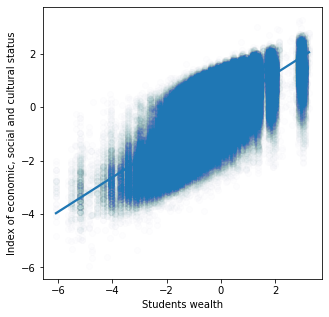

In [45]:
# Scatter plot between grade compared to modal grade in country and index of economic, social and cultural status
rcParams['figure.figsize'] = 5,5
sb.regplot(data = pisa, x = 'WEALTH', y = 'ESCS', 
           scatter_kws = {'alpha': 1/150});
plt.xlabel('Students wealth')
plt.ylabel('Index of economic, social and cultural status');

> There is a quite strong positive correlation between a students wealth and the economic, social and cultural status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


> Students that have a immigration status of 'First-Generation' have the lowest sense of belonging to their school (`BELONG`) amongst all three immigration stati (`IMMIG`). This might be explained by the fact that the students themselves immigrated and switched school from the home country to the new country. On the other side most of the students in the second-generation immigration group have been attending school from class one as the native students. This might lead to the higher sense of belonging to the school for those groups, which is shown in the chart.

> The barplot shows that better grades (`GRADE`) correlate with a higher sense of belonging to the school (`BELONG`). The uncertainty whiskers at the grade values of 2.0 indicate that there might be students that have a less sense of belonging to the school even less than students with less than -1.0 in the grade values. This seems to be counterintuitive. It could be explained in the following way: Some students that are extrordinary good in school and way better than their classmates, might feel they do not belong to the school, because it does not fit their capabilities.

> The violine plots and the boxplots for the comparism between `IMMIG`(Immigration status) and `ESCS` indicate that the students with first generation immigration status have most of the index scores distributed between 0.5 and 1 whereas the native students and second generation immigration students have their maximum of indices distributed at an index between -0.5 and -1. This leads to the conclusion that first generation immigrants have a higher chance to have a higher economic, social and cultural status than native students or second generation immigrants. 

> Students with second-generation immigration status (`IMMIG`) have on average better grades compared to modal grades in the country (`GRADE`) than the native and the first-generation immigration students, whereas the difference to the native students is very little. 

> The mean international grade (`ST01Q01`) of the native immigration group (`IMMIG`) is higher than the other two. But all of them are very close. 

> The charts show that the native students (`IMMIG`) are on average less wealthy (`WEALTH`). In the boxplot the median wealth of the native students is lower than of those with immigration background. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a quite strong positive correlation between a students wealth (`WEALTH`) and the economic, social and cultural status (`ESCS`).

> The plots between `GRADE` (grade compared to modal grade in country) and `ESCS` (Index of economic, social and cultural status) indicates a slightly positive correlation. 


## Multivariate Exploration

> In the following section I will focus on the features that showed correlations between each other and add a third variable to the visualizations. 

### Correlations between the grade compared to the modal grade of the country (`GRADE`), the sense of belonging to school (`BELONG`) for different immigration stati (`IMMIG`)

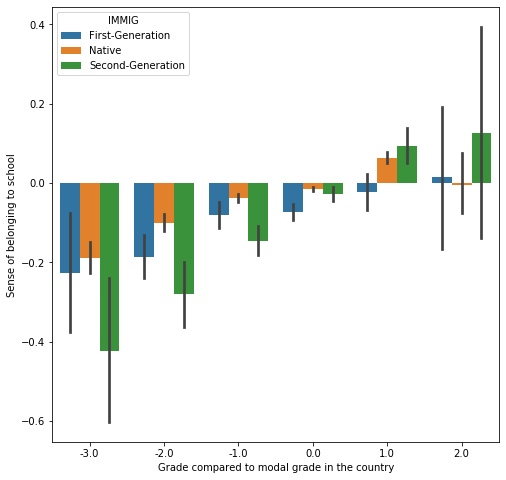

In [46]:
# setting figure size
rcParams['figure.figsize'] = 8,8

# plotting a multivariate barplot 
sb.barplot(data = pisa, x = 'GRADE', y = 'BELONG', hue = 'IMMIG');
plt.xlabel('Grade compared to modal grade in the country')
plt.ylabel('Sense of belonging to school');

> The bivariate analysis showed that students with the immigration status of 'First-Generation' have on average the lowest sense of belonging to their school amongst all three `IMMIG` groups. By looking at the sense of belonging to school separated by grade, the data reveals that for the grade values of 1.0 and less the sense of belonging to school is on average much lower for the second-generation immigration students than for both the first-generation immigration and the native students. For the grades of 1.0 and more the sense of belonging to school is on average even higher for second-generation immigration students. It seems that beeing an immigrant in the second generation in a country the sense of belonging to school is strengthened in either direction, for worse grades to a lower sense of belonging to school and for better grades to a higher sense of belonging to school. 

### Exploration of `WEALTH`, `ESCS` and `IMMIG`

In the scatterplot chart where I compare the `WEALTH` (students wealth) and `ESCS` (index of economic, social and cultural status), I also want to add a third variable `IMMIG` encoded by color to investigate how the immigration status is distributed over the plots. 

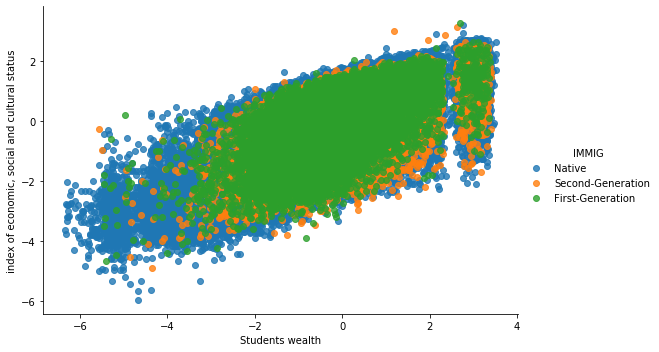

In [47]:
rcParams['figure.figsize'] = 15,15
g = sb.FacetGrid(data = pisa, hue = 'IMMIG', 
                 hue_order = [ 'Native', 'Second-Generation', 'First-Generation'], height = 5, aspect = 1.5)
g = g.map(sb.regplot, 'WEALTH', 'ESCS', x_jitter = 0.3, fit_reg = False)
g.add_legend()
plt.xlabel('Students wealth')
plt.ylabel('index of economic, social and cultural status');


> The plot indicates that the students with immigration status either First-Generation or Second-Generation are located slightly more to the top right of the plot. This leads to the assumption that students with immigration background are wealthier and have a higher economic, social and cultural status. This is a finding that is rather counter intuitive.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The bivariate exploration showed that students with the immigration status of 'First-Generation' have on average the lowest sense of belonging to their school amongst all three `IMMIG` groups. By looking at the sense of belonging to school separated by grade, the data reveals that for the grade values of 1.0 and less the sense of belonging to school is on average much lower for the second-generation immigration students than for both the first-generation immigration and the native students. For the grades of 1.0 and more the sense of belonging to school is on average even higher for second-generation immigration students. It seems that beeing an immigrant in the second generation in a country the sense of belonging to school is strengthened in either direction, for worse grades to a lower sense of belonging to school and for better grades to a higher sense of belonging to school. 

> The bivariate exploration showed that the native students are on average less wealthy. In the boxplot the median wealth of the native students was lower than of those with immigration background. The multivariate analysis of all three features showed that the students with immigration status either First-Generation or Second-Generation are located slightly more to the top right of the plot. This leads to the assumption that students with immigration background are indeed on average wealthier and have a higher economic, social and cultural status. This is a finding that is rather counter intuitive. The effects are quite little. 

### Were there any interesting or surprising interactions between features?

> It is surprising that not the first-generation immigration students have a lower sense of belonging to school, but the second-generation students. 
> Moreover it is surprising that students with immigration background are on average wealthier and have a higher economic, social and cultural status. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

# Sources

- https://knowledge.udacity.com/questions/135696
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
- https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value